# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
#!pip install --upgrade numpy==1.26.4
#!pip install --upgrade pandas==2.2.2
#!pip install --upgrade spacy==3.7.5
#!pip install --upgrade scipy==1.12
#!pip install --upgrade pydantic==2.10.5
#!pip install wordcloud==1.9.4
#!python -m spacy download en_core_web_sm

## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations
from collections import Counter

In [3]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
## mounting the google drive, use the following :
##from google.colab import drive
##drive.mount('/content/drive')

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [5]:
import os

In [6]:
##DATA_PATH = '/content/drive/MyDrive/Fake News Data/'
##true_news = os.path.join(DATA_PATH, 'True.csv')
##fake_news = os.path.join(DATA_PATH, 'Fake.csv')

In [7]:
# Import the first file - True.csv
df_true = pd.read_csv('True.csv')

# Import the second file - Fake.csv
df_fake = pd.read_csv('Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [8]:
# Inspect the DataFrame with True News to understand the given data
df_true.describe()

,title,text,date
count,21417,21417,21417
unique,20826,21192,716
top,Factbox: Trump fills top jobs for his administration,"(Reuters) - Highlights for U.S. President Donald Trump’s administration on Thursday: The United States drops a massive GBU-43 bomb, the largest non-nuclear bomb it has ever used in combat, in Afghanistan against a series of caves used by Islamic State militants, the Pentagon says. Trump says Pyongyang is a problem that “will be taken care of” amid speculation that North Korea is on the verge of a sixth nuclear test. Military force cannot resolve tension over North Korea, China warns, while an influential Chinese newspaper urges Pyongyang to halt its nuclear program in exchange for Beijing’s protection. The Trump administration is focusing its North Korea strategy on tougher economic sanctions, possibly including intercepting cargo ships and punishing Chinese banks doing business with Pyongyang, U.S. officials say. Trump says “things will work out fine” between the United States and Russia, a day after declaring U.S.-Russian relations may be at an all-time low. Trump signals he could be moving closer to the mainstream on monetary policy, saying he has not ruled out reappointment of Janet Yellen as Federal Reserve chair as he considers his choices for the U.S. central bank. [nL1N1HL14B] Trump signs a resolution that will allow U.S. states to restrict how federal funds for contraception and reproductive health are spent, a move cheered by anti-abortion campaigners. Democratic Senator Chris Van Hollen presses Deutsche Bank to release information about issues including Trump’s debt and any bank meetings with Trump administration officials, saying he has “great concern” about possible conflicts of interest. EXPORT-IMPORT BANK Trump’s office says he plans to revive the hobbled Export-Import Bank of the United States, a victory for American manufacturers such as Boeing Co and General Electric Co that have overseas customers that use the agency’s government-backed loans to purchase their products. Top Wall Street bankers say they are having positive discussions about financial regulation in Washington, and downplay the idea U.S. policymakers may force their institutions to split up. The United States is pushing for trade to be a key issue in top-level economic talks with Japan, a source says, an unwelcome development for Tokyo, which is seeking to fend off U.S. pressure to reduce the bilateral trade imbalance. Trump’s administration has focused on one group of illegal immigrants more than others: women with children, according to eight Department of Homeland Security officials interviewed by Reuters about agency planning.","December 20, 2017"
freq,14,8,182


In [9]:
# Inspect the DataFrame with Fake News to understand the given data
df_fake.describe()

,title,text,date
count,23502,23502,23481
unique,17914,17466,1692
top,MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead,,"May 10, 2017"
freq,6,626,46


In [10]:
# Print the column details for True News DataFrame
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [11]:
# Print the column details for Fake News Dataframe
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [12]:
# Print the column names of both DataFrames
print("True News Columns: " ,df_true.columns)
print("Fake News Columns: " ,df_fake.columns)

True News Columns:  Index(['title', 'text', 'date'], dtype='object')
Fake News Columns:  Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [13]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
df_true['news_label'] = 1  # 1 for true news
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
df_fake['news_label'] = 0  # 0 for fake news

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [14]:
# Combine the true and fake news DataFrames into a single DataFrame
df_merge = pd.concat([df_true, df_fake], ignore_index=True)

In [15]:
# Display the first 5 rows of the combined DataFrame to verify the result
df_merge.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [16]:
# Check Presence of Null Values
df_merge.isnull().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

In [17]:
# Handle Rows with Null Values
# null values are very low, we drop these rows
df_merge.dropna(inplace=True)

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [18]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
df_merge['news_text'] = df_merge['title'] + ' ' + df_merge['text']

# Drop the irrelevant columns from the DataFrame as they are no longer needed
df_merge.drop(['title', 'text','date'], axis=1, inplace=True)
# Display the first 5 rows of the updated DataFrame to check the result
df_merge.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [19]:
# there are also duplicates in the data that we will drop
df_merge.drop_duplicates(inplace=True)
df_merge.shape

(39105, 2)

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [20]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame()
# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = df_merge['news_label']

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [21]:
# Write the function here to clean the text and remove all the unnecessary elements
# Convert to lower case
# Remove text in square brackets
# Remove punctuation
# Remove words with numbers
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove words with numbers
    text = re.sub('\w*\d\w*', '', text)
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [22]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['cleaned_text']=df_merge['news_text'].apply(clean_text)

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [23]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
def lemma_pos_tag(column):
    doc = nlp(column)
    lemma_pos = [(token.lemma_, token.pos_) for token in doc if not token.is_stop and token.tag_ in {'NN', 'NNS'}]
    return lemma_pos

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [24]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
tqdm.pandas()
df_clean['lemma_pos'] = df_clean['cleaned_text'].progress_apply(lambda x : lemma_pos_tag(x))

100%|████████████████████████████████████████████████████████████████████████████| 39105/39105 [40:48<00:00, 15.97it/s]


In [25]:
# creating a column for lemmatized text without POS tags for further analysis
df_clean['lemma_text'] = df_clean['lemma_pos'].progress_apply(lambda x : " ".join([lemma for lemma, pos in x]))

100%|█████████████████████████████████████████████████████████████████████████| 39105/39105 [00:00<00:00, 82776.22it/s]


In [26]:
df_clean.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [27]:
#file_path = '/content/drive/MyDrive/Fake News Data/clean_df.csv'

### Save the Cleaned data as a csv file (Recommended)

In [29]:
## Recommended to perform the below steps to save time while rerunning the code

df_clean.to_csv('df_clean.csv', index=False)

In [30]:
df_clean = pd.read_csv('df_clean.csv')

In [31]:
# Check the first few rows of the DataFrame
df_clean.head(2)

news_label  \
0           1   
1           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [32]:
# Check the dimensions of the DataFrame
df_clean.shape

(39105, 4)

In [33]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39105 entries, 0 to 39104
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   news_label    39105 non-null  int64 
 1   cleaned_text  39105 non-null  object
 2   lemma_pos     39105 non-null  object
 3   lemma_text    39096 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [34]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split
df_clean_train,df_clean_test = train_test_split(df_clean, train_size=0.7, test_size=0.3, random_state=42, stratify=df_clean['news_label'])

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [35]:
# Add a new column to calculate the character length of cleaned news text
df_clean_train['len_clean_text'] = df_clean_train['cleaned_text'].apply(lambda x :len(x))

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean_train['len_lemma_text'] = df_clean_train['lemma_text'].apply(lambda z :len(z) if isinstance(z, str) else 0)

In [36]:
df_clean_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27373 entries, 33216 to 30125
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   news_label      27373 non-null  int64 
 1   cleaned_text    27373 non-null  object
 2   lemma_pos       27373 non-null  object
 3   lemma_text      27368 non-null  object
 4   len_clean_text  27373 non-null  int64 
 5   len_lemma_text  27373 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.5+ MB


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

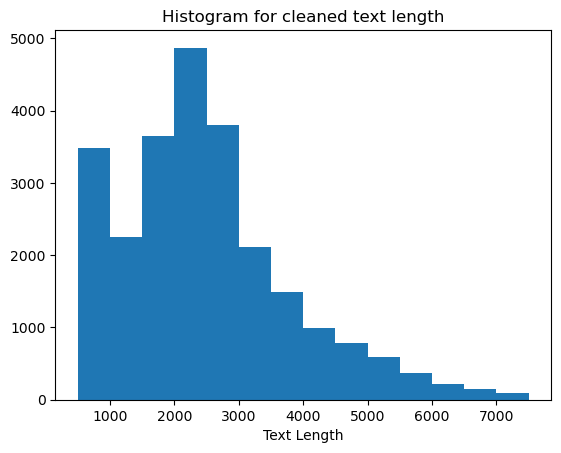

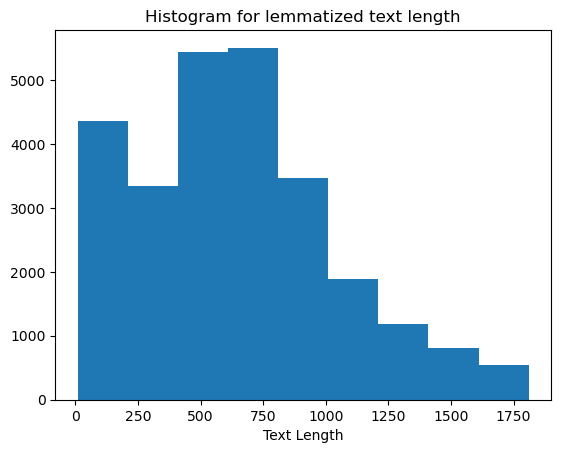

In [37]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text
plt.hist(df_clean_train['len_clean_text'], bins=[i for i in range(500,8000,500)])
plt.xlabel('Text Length')
plt.title("Histogram for cleaned text length")
plt.show()

# Add histogram for lemmatized news text with POS tags removed
plt.hist(df_clean_train['len_lemma_text'], bins=[i for i in range(10,2000,200)])
plt.xlabel('Text Length')
plt.title("Histogram for lemmatized text length")
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [38]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

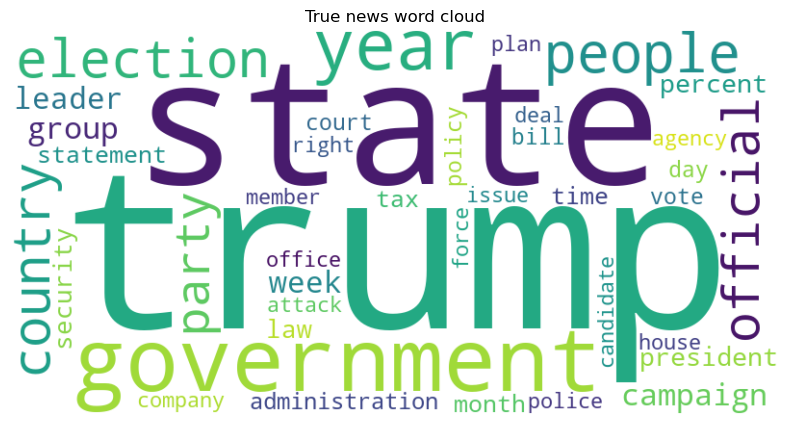

In [39]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
df_clean_train_true = df_clean_train[df_clean_train['news_label']==1]
# creating text from the cleaned text column
text = " ".join(str(word) for word in df_clean_train_true['lemma_text'] )

# Count the frequency of each word
word_freq = Counter(text.split())

# Get the 40 most common words
top_40_words = dict(word_freq.most_common(40))

# Generate word cloud for True News
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_40_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("True news word cloud")
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

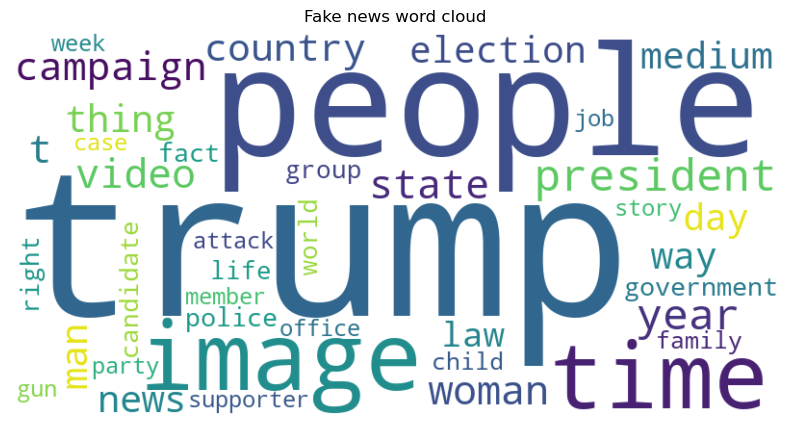

In [40]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
df_clean_train_fake = df_clean_train[df_clean_train['news_label']==0]
# creating text from the lemma text column
text = " ".join(str(word) for word in df_clean_train_fake['lemma_text'] )

# Count the frequency of each word
word_freq = Counter(text.split())

# Get the 40 most common words
top_40_words = dict(word_freq.most_common(40))

# Generate word cloud for Fake News
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_40_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Fake news word cloud")
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [41]:
# Write a function to get the specified top n-grams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngrams(text, n=1, top_n=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_n]
# function to plot the graph
def plot_bar_graph(data):
    ngrams, counts = zip(*data)

    ngram =[' '.join(ngram) for ngram in ngrams]
    plt.barh(ngram, counts)

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [42]:
# Handle NaN values in the text data
df_clean_train_true.dropna(inplace=True)
df_clean_train_true.isna().sum()

news_label        0
cleaned_text      0
lemma_pos         0
lemma_text        0
len_clean_text    0
len_lemma_text    0
dtype: int64

In [43]:
df_clean_train_fake.dropna(inplace=True)
df_clean_train_fake.isna().sum()

news_label        0
cleaned_text      0
lemma_pos         0
lemma_text        0
len_clean_text    0
len_lemma_text    0
dtype: int64

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

[('trump', 24769), ('state', 14196), ('government', 13727), ('year', 13190), ('people', 10613), ('election', 10004), ('country', 9705), ('official', 9167), ('party', 8038), ('campaign', 7717)]


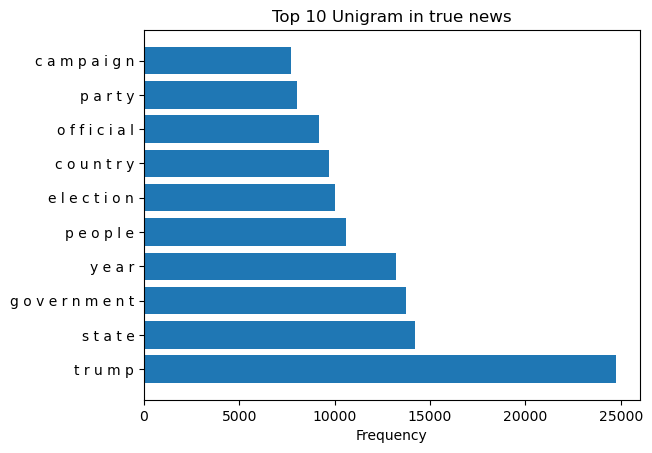

In [44]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
# True news n-grams
true_text_list = df_clean_train_true[df_clean_train_true['news_label'] == 1]['lemma_text'].tolist()
true_unigrams = get_top_ngrams(true_text_list, n=1)

print(true_unigrams)

# print the bar plot
plot_bar_graph(true_unigrams)
plt.title('Top 10 Unigram in true news')
plt.xlabel('Frequency')
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



[('trump campaign', 1217), ('news conference', 947), ('percent percent', 854), ('tax reform', 757), ('climate change', 735), ('request comment', 711), ('trump administration', 663), ('intelligence agency', 653), ('security force', 643), ('house representative', 642)]


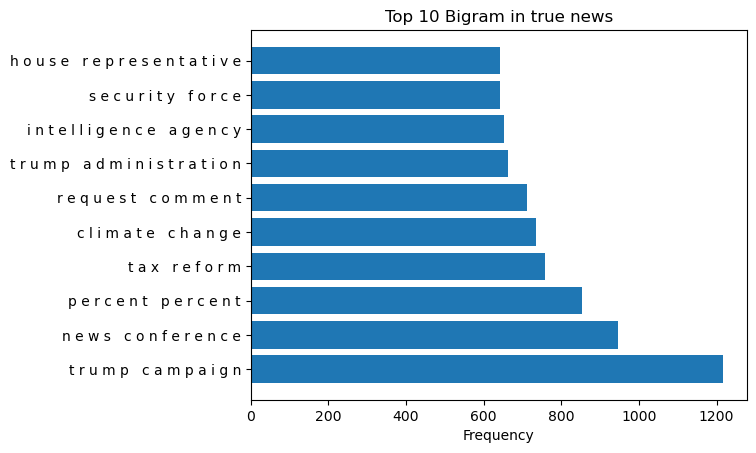

In [45]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
true_bigrams = get_top_ngrams(true_text_list, n=2)

print(true_bigrams)

# print the bar plot
plot_bar_graph(true_bigrams)
plt.title('Top 10 Bigram in true news')
plt.xlabel('Frequency')
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



[('official condition anonymity', 218), ('trump transition team', 185), ('tax rate percent', 171), ('article staff involvement', 129), ('staff involvement creation', 129), ('involvement creation production', 129), ('percent percent percent', 127), ('rate percent percent', 122), ('use email server', 114), ('state department official', 110)]


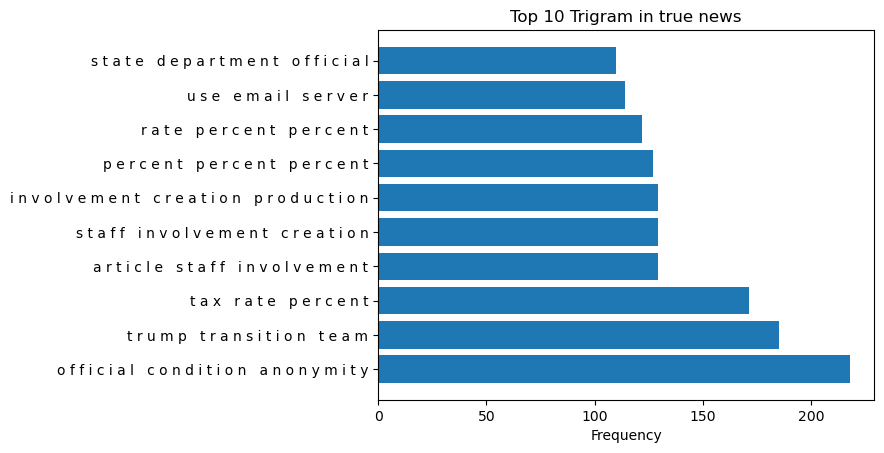

In [46]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
true_trigrams = get_top_ngrams(true_text_list, n=3)

print(true_trigrams)

# print the bar plot
plot_bar_graph(true_trigrams)
plt.title('Top 10 Trigram in true news')
plt.xlabel('Frequency')
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

[('trump', 31232), ('people', 14696), ('image', 9454), ('time', 8629), ('president', 7931), ('year', 7691), ('woman', 6664), ('video', 6592), ('state', 6564), ('campaign', 6119)]


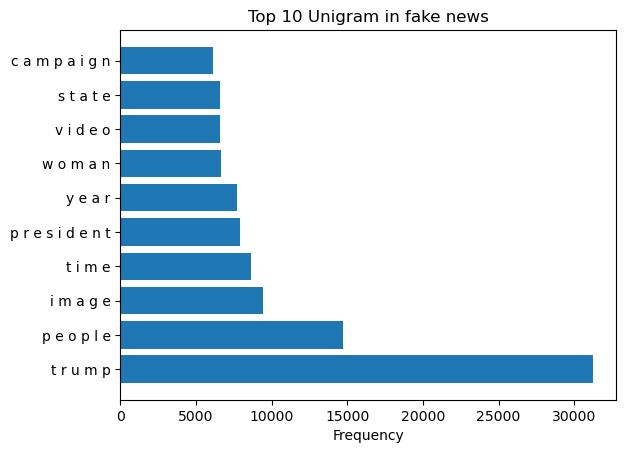

In [47]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
 #Fake news n-grams
fake_text_list = df_clean_train_fake[df_clean_train_fake['news_label'] == 0]['lemma_text'].tolist()
fake_unigrams = get_top_ngrams(fake_text_list, n=1)

print(fake_unigrams)

# print the bar plot
plot_bar_graph(fake_unigrams)
plt.title('Top 10 Unigram in fake news')
plt.xlabel('Frequency')
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



[('image image', 1277), ('trump supporter', 1208), ('trump campaign', 1021), ('screen capture', 940), ('police officer', 848), ('trump realdonaldtrump', 786), ('donald trump', 772), ('law enforcement', 726), ('image video', 684), ('getty image', 664)]


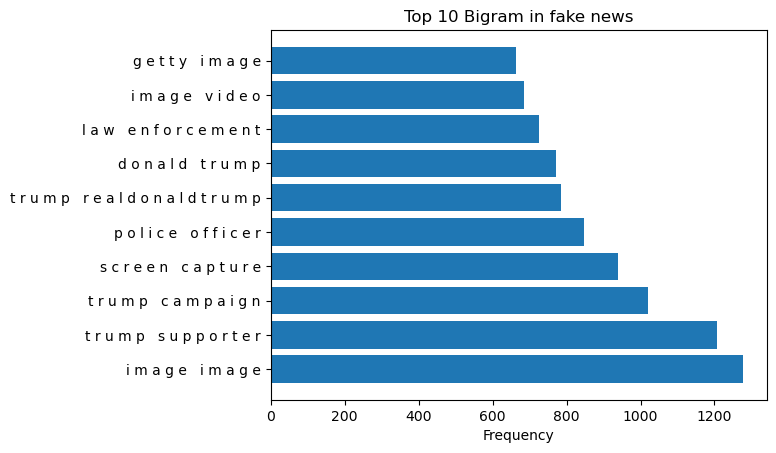

In [48]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
fake_bigrams = get_top_ngrams(fake_text_list, n=2)

print(fake_bigrams)

# print the bar plot
plot_bar_graph(fake_bigrams)
plt.title('Top 10 Bigram in fake news')
plt.xlabel('Frequency')
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



[('video screen capture', 529), ('image video screen', 502), ('image getty image', 407), ('image screen capture', 315), ('news century wire', 311), ('image chip image', 184), ('image video screenshot', 165), ('law enforcement officer', 118), ('trump realdonaldtrump trump', 90), ('spencer plattgetty image', 85)]


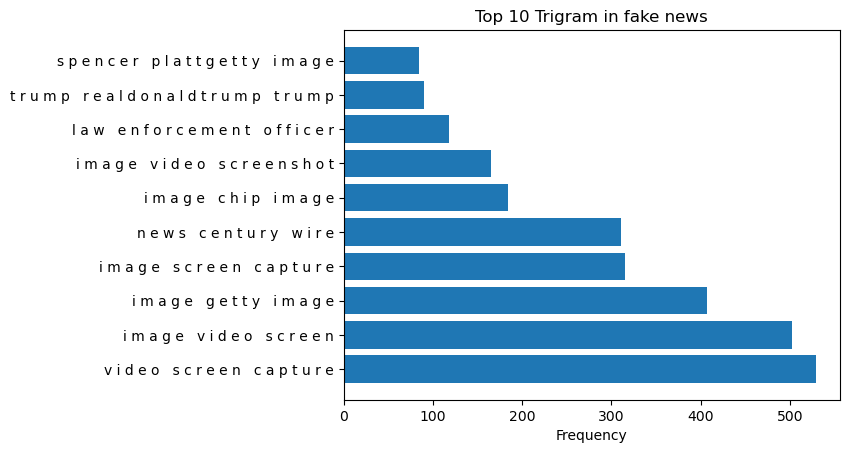

In [49]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
fake_trigrams = get_top_ngrams(fake_text_list, n=3)

print(fake_trigrams)

# print the bar plot
plot_bar_graph(fake_trigrams)
plt.title('Top 10 Trigram in fake news')
plt.xlabel('Frequency')
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [50]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [51]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [52]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [53]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [54]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [55]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [56]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [57]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [58]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [59]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [60]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [61]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [62]:
#!pip install --upgrade numpy==1.26.4
#!pip install --upgrade gensim

In [63]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api
import gensim

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [64]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
w2v_model = api.load('word2vec-google-news-300')

In [65]:
#shape of the model
w2v_model.vectors.shape

(3000000, 300)

In [66]:
df_clean_train.dropna(inplace=True)
df_clean_test.dropna(inplace=True)
df_clean_train.isna().sum()

news_label        0
cleaned_text      0
lemma_pos         0
lemma_text        0
len_clean_text    0
len_lemma_text    0
dtype: int64

In [67]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
# for train data
df_clean_train_vec = np.array([
    np.mean([w2v_model[word] if word in w2v_model else np.zeros(w2v_model.vector_size)
             for word in sentence.split(" ")], axis=0)
    for sentence in df_clean_train['lemma_text']
])

# for test data
df_clean_test_vec = np.array([
    np.mean([w2v_model[word] if word in w2v_model else np.zeros(w2v_model.vector_size)
             for word in sentence.split(" ")], axis=0)
    for sentence in df_clean_test['lemma_text'] if isinstance(sentence, str)
])

In [68]:
## Extract the target variable for the training data and validation data
y_Train = df_clean_train["news_label"]
y_test = df_clean_test["news_label"]

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [70]:
## Initialise Logistic Regression model
lr = LogisticRegression()
## Train Logistic Regression model on training data
lr_model = lr.fit(df_clean_train_vec,y_Train)

## prediction on train data
y_pred_lr_train = lr_model.predict(df_clean_train_vec)
## Predict on validation data
y_pred_lr_test = lr_model.predict(df_clean_test_vec)

In [71]:
# calculating and printing accuracy, precision, recall and f1 score metrics on train data
acc_lc_train = accuracy_score(y_Train,y_pred_lr_train)
pr_lc_train = precision_score(y_Train,y_pred_lr_train)
rc_lc_train = recall_score(y_Train,y_pred_lr_train)
f1_lc_train = f1_score(y_Train, y_pred_lr_train)

print("Accuracy_train : ", acc_lc_train)
print("Precision_train : ", pr_lc_train)
print("Recall_train : ", rc_lc_train)
print("f1-score_train : ", f1_lc_train)

Accuracy_train :  0.9153756211634025
Precision_train :  0.9152407481098289
Recall_train :  0.9300444803881924
f1-score_train :  0.9225832330525471


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [72]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
pr_lc_test = precision_score(y_test,y_pred_lr_test)
rc_lc_test = recall_score(y_test,y_pred_lr_test)
acc_lc_test = accuracy_score(y_test,y_pred_lr_test)
f1_lc_test = f1_score(y_test, y_pred_lr_test)

print("Accuracy_test : ", acc_lc_test)
print("Precision_test : ", pr_lc_test)
print("Recall_test : ", rc_lc_test)
print("f1-score_test : ", f1_lc_test)

Accuracy_test :  0.9108969986357435
Precision_test :  0.9123215394165115
Recall_test :  0.9245164334014783
f1-score_test :  0.9183785050378818


In [73]:
# Classification Report
print("classification Report - Logistic Regression Model: \n", classification_report(y_test,y_pred_lr_test))

classification Report - Logistic Regression Model: 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5369
           1       0.91      0.92      0.92      6359

    accuracy                           0.91     11728
   macro avg       0.91      0.91      0.91     11728
weighted avg       0.91      0.91      0.91     11728



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [74]:
## Initialise Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
## Train Decision Tree model on training data
dt_model = dt.fit(df_clean_train_vec,y_Train)
## Predict on validation data
y_pred_dt = dt_model.predict(df_clean_test_vec)

#### Grid Search to tune the hyperparamter of decision tree.

In [75]:
# creating the parameter grid to find optimal hyperparameter
params_dt = {
    'max_depth' : range(1,10,2),
    'max_features': range(1,10,2,),
    'min_samples_leaf' : range(1,150,50)
}

In [76]:
# Instantiate grid search model
grid_search_dt = GridSearchCV(estimator=dt,
                           param_grid=params_dt,
                           cv=3,
                           verbose=1,
                           return_train_score=True)

In [77]:
%%time
grid_search_dt.fit(df_clean_train_vec,y_Train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
CPU times: total: 45 s
Wall time: 45.9 s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 10, 2),
                         'max_features': range(1, 10, 2),
                         'min_samples_leaf': range(1, 150, 50)},
             return_train_score=True, verbose=1)

In [78]:
# best hyperparameters
print(grid_search_dt.best_params_)

{'max_depth': 9, 'max_features': 9, 'min_samples_leaf': 1}


In [79]:
# Prediction on train data
y_train_pred_class_dt = grid_search_dt.predict(df_clean_train_vec)

In [80]:
# Calculate and print accuracy, precision, recall, f1-score on predicted labels on train data
pr_dtm_train = precision_score(y_Train,y_train_pred_class_dt)
rc_dtm_train = recall_score(y_Train,y_train_pred_class_dt)
acc_dtm_train = accuracy_score(y_Train,y_train_pred_class_dt)
f1_dtm_train = f1_score(y_Train, y_train_pred_class_dt)

print("Accuracy_dtm_train : ", acc_dtm_train)
print("Precision_dtm_train : ", pr_dtm_train)
print("Recall_dtm_train : ", rc_dtm_train)
print("f1-score_dtm_train : ", f1_dtm_train)

Accuracy_dtm_train :  0.8513592516807951
Precision_dtm_train :  0.8545562286015275
Recall_dtm_train :  0.8747135732578515
f1-score_dtm_train :  0.8645174182375275


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [81]:
# Prediction on test data
y_test_pred_class_dt = grid_search_dt.predict(df_clean_test_vec)

In [82]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
pr_dtm_test = precision_score(y_test,y_test_pred_class_dt)
rc_dtm_test = recall_score(y_test,y_test_pred_class_dt)
acc_dtm_test = accuracy_score(y_test,y_test_pred_class_dt)
f1_dtm_test = f1_score(y_test, y_test_pred_class_dt)

print("Accuracy_dtm_test : ", acc_dtm_test)
print("Precision_dtm_test : ", pr_dtm_test)
print("Recall_dtm_test : ", rc_dtm_test)
print("f1-score_dtm_test : ", f1_dtm_test)

Accuracy_dtm_test :  0.7907571623465212
Precision_dtm_test :  0.7965072133637054
Recall_dtm_test :  0.8248152225192641
f1-score_dtm_test :  0.8104140914709519


In [83]:
# Classification Report
print("classification Report Decision Tree Model: \n", classification_report(y_test,y_test_pred_class_dt))

classification Report Decision Tree Model: 
               precision    recall  f1-score   support

           0       0.78      0.75      0.77      5369
           1       0.80      0.82      0.81      6359

    accuracy                           0.79     11728
   macro avg       0.79      0.79      0.79     11728
weighted avg       0.79      0.79      0.79     11728



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [84]:
## Initialise Random Forest model
rf = RandomForestClassifier(random_state=42)
## Train Random Forest model on training data
rf_model = rf.fit(df_clean_train_vec, y_Train)
## Predict on validation data
y_pred_rf_test = rf_model.predict(df_clean_test_vec)

### Grid search to tune hyperparameters

In [85]:
# creating the parameter grid to find optimal hyperparameter

params = {
    'max_depth' : range(1,10,2),
    'max_features': range(1,10,2,),
    'min_samples_leaf' : range(1,100,50),
    'n_estimators': [20,50]
}

In [86]:
# Instantiate grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=3,
                           n_jobs=-1,
                           verbose=1,
                           return_train_score=True)

In [87]:
%%time
grid_search.fit(df_clean_train_vec,y_Train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
CPU times: total: 19.6 s
Wall time: 3min 32s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 10, 2),
                         'max_features': range(1, 10, 2),
                         'min_samples_leaf': range(1, 100, 50),
                         'n_estimators': [20, 50]},
             return_train_score=True, verbose=1)

In [88]:
# best hyperparameters
print(grid_search.best_params_)

{'max_depth': 9, 'max_features': 9, 'min_samples_leaf': 1, 'n_estimators': 50}


In [89]:
# model with the best hyperparameters

classifier_rfm_model = RandomForestClassifier(bootstrap=True,
                             max_depth=9,
                             min_samples_leaf=1,
                             max_features=9,
                             n_estimators=50
                             )

In [90]:
# fit the model
classifier_rfm_model.fit(df_clean_train_vec,y_Train)

RandomForestClassifier(max_depth=9, max_features=9, n_estimators=50)

In [91]:
# Making Predction on train data
y_train_pred_rfm = classifier_rfm_model.predict(df_clean_train_vec)

In [92]:
# Calculate and print accuracy, precision, recall, f1-score on predicted labels
pr_rfm_train = precision_score(y_Train,y_train_pred_rfm)
rc_rfm_train = recall_score(y_Train,y_train_pred_rfm)
acc_rfm_train= accuracy_score(y_Train,y_train_pred_rfm)
f1_rfm_train = f1_score(y_Train, y_train_pred_rfm)

print("Accuracy_train_rfm : ", acc_rfm_train)
print("Precision_train_rfm : ", pr_rfm_train)
print("Recall_train_rfm : ", rc_rfm_train)
print("f1-score_train_rfm : ", f1_rfm_train)

Accuracy_train_rfm :  0.9193949137679042
Precision_train_rfm :  0.9144356955380577
Recall_train_rfm :  0.9392101361369457
f1-score_train_rfm :  0.9266573575370703


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [93]:
y_test_pred_rfm = classifier_rfm_model.predict(df_clean_test_vec)

In [94]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

acc_rf_test = accuracy_score(y_test, y_pred_rf_test)
pr_rf_test = precision_score(y_test, y_pred_rf_test)
rc_rf_test = recall_score(y_test, y_pred_rf_test)
f1_rf_test = f1_score(y_test, y_pred_rf_test)

print("Accuracy test : ", acc_rf_test)
print("Precision test : ", pr_rf_test)
print("Recall test : ", rc_rf_test)
print("f1-score test : ", f1_rf_test)


Accuracy test :  0.8836971350613916
Precision test :  0.878581173260573
Recall test :  0.9114640666771505
f1-score test :  0.8947205927755479


In [95]:
# Classification Report

print("classification Report - Random Forest Model: \n", classification_report(y_test, y_pred_rf_test))


classification Report - Random Forest Model: 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      5369
           1       0.88      0.91      0.89      6359

    accuracy                           0.88     11728
   macro avg       0.88      0.88      0.88     11728
weighted avg       0.88      0.88      0.88     11728



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

In [96]:
# comparision of various metrics from all three models
metrics_dict = {
      'Metric': ['train_Accuracy', 'test_Accuracy', 'train_Precision', 'test_Precision', 'train_Recall', 'test_Recall', 'train_F1-Score', 'test_F1-Score'],
      'decision_tree': [acc_dtm_train, acc_dtm_test, pr_dtm_train, pr_dtm_test, rc_dtm_train, rc_dtm_test, f1_dtm_train,f1_dtm_test],
      'random_forest': [acc_rfm_train, acc_rf_test, pr_rfm_train, pr_rf_test, rc_rfm_train, rc_rf_test, f1_rfm_train, f1_rf_test],
      'logistic_regression' :[acc_lc_train, acc_lc_test, pr_lc_train, pr_lc_test, rc_lc_train, rc_lc_test, f1_lc_train, f1_lc_test]
  }


metric_df =pd.DataFrame(metrics_dict)
metric_df

,Metric,decision_tree,random_forest,logistic_regression
0,train_Accuracy,0.851359,0.919395,0.915376
1,test_Accuracy,0.790757,0.883697,0.910897
2,train_Precision,0.854556,0.914436,0.915241
3,test_Precision,0.796507,0.878581,0.912322
4,train_Recall,0.874714,0.939210,0.930044
5,test_Recall,0.824815,0.911464,0.924516
6,train_F1-Score,0.864517,0.926657,0.922583
7,test_F1-Score,0.810414,0.894721,0.918379


- As observed from the word cloud of true and fake news does not seem to be much different in top 40 frequent words.
- we have performed Unigram, Bigram and Traigram analysis on true and fake data to see if we can find any pattern
- Unigrams are shows nothing much difference but essentially the wordcloud words just represented in a bar chart format.
- in Bigram analysis we can see some difference we see that continous set of words of "Police officer", "getty image", "image image" etc are the word which appear frequently in the fake news articles.
- Trigram gives us much more clear picture of fake news articles. we can see that words which mostly involves images and video along with bigram words tends to be from fake news articles.
    

#### Of all the 3 models we trained above can clearly see that basic logistic regression model provides us relatively better result in terms of precision, recall and f1-score matrix comparision.

<font color = green> Below are the metrics evaluated for logistic regression:
##### <font color = green> Accuracy_test :  0.909696
##### <font color = green> Precision_test  :  0.910344
##### <font color = green> Recall_test  :  0.924516
##### <font color = green> f1-score_test  :  0.917375

-Here even though all the metrics are really important we can see both precision and recall is having almost similar scores.
We have analysed F1 score metric as well which take both precision and recall in consideration and create a balanced output of both. This balanced metric prevents a scenario where a model might be highly accurate but fail to identify enough true positives or generate too many false positives. This is particularly important when dealing with imbalanced datasets.

